In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt


#Import csv
df = pd.read_csv("../Resources/Climate_Deniers_Recent")
df.head()

,created_at,lng,lat,topic,sentiment,gender,aggressiveness,year
0,2017-01-01 00:15:33+00:00,NaN,NaN,Weather Extremes,0.623190,undefined,not aggressive,2017
1,2017-01-01 00:19:19+00:00,NaN,NaN,Seriousness of Gas Emissions,-0.699619,female,aggressive,2017
2,2017-01-01 00:20:18+00:00,-97.517054,35.472989,Donald Trump versus Science,-0.479655,male,aggressive,2017
3,2017-01-01 00:45:34+00:00,NaN,NaN,Donald Trump versus Science,0.424004,male,not aggressive,2017
4,2017-01-01 00:46:18+00:00,NaN,NaN,Weather Extremes,-0.034723,female,not aggressive,2017


In [9]:
dates = pd.to_datetime(df["created_at"], infer_datetime_format=True)
df_dates = df.copy()
df_dates["date"] = dates.dt.date

In [11]:
df_dates.to_csv("df_recent_withdates.csv")

<Figure size 288000x144000 with 0 Axes>

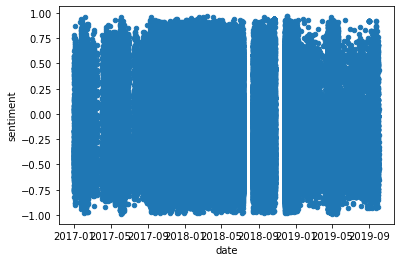

<Figure size 288000x144000 with 0 Axes>

In [15]:
df_dates.plot.scatter(x="date", y="sentiment")
plt.figure(figsize=(4000,2000))

In [16]:
df_month = df.copy()
df_month["month"] = dates.dt.month
df_month

,created_at,lng,lat,topic,sentiment,gender,aggressiveness,year,month
0,2017-01-01 00:15:33+00:00,NaN,NaN,Weather Extremes,0.623190,undefined,not aggressive,2017,1
1,2017-01-01 00:19:19+00:00,NaN,NaN,Seriousness of Gas Emissions,-0.699619,female,aggressive,2017,1
2,2017-01-01 00:20:18+00:00,-97.517054,35.472989,Donald Trump versus Science,-0.479655,male,aggressive,2017,1
3,2017-01-01 00:45:34+00:00,NaN,NaN,Donald Trump versus Science,0.424004,male,not aggressive,2017,1
4,2017-01-01 00:46:18+00:00,NaN,NaN,Weather Extremes,-0.034723,female,not aggressive,2017,1
...,...,...,...,...,...,...,...,...,...
724487,2019-10-01 01:16:48+00:00,NaN,NaN,Importance of Human Intervantion,-0.443313,female,not aggressive,2019,10
724488,2019-10-01 01:25:01+00:00,-125.002441,55.001251,Ideological Positions on Global Warming,-0.544534,female,not aggressive,2019,10
724489,2019-10-01 02:13:21+00:00,-122.248549,47.264013,Politics,0.430309,female,not aggressive,2019,10
724490,2019-10-01 03:26:13+00:00,-83.000180,40.250340,Donald Trump versus Science,-0.652558,male,not aggressive,2019,10


In [22]:
#Group by topic for each month and year

df_topic = df_month.groupby(["year", "month", "topic"]).count()
df_topic

created_at  lng  lat  \
year month topic                                                           
2017 1     Donald Trump versus Science                    1441  497  497   
           Global stance                                   953  333  333   
           Ideological Positions on Global Warming         394  136  136   
           Impact of Resource Overconsumption              161   51   51   
           Importance of Human Intervantion                582  174  174   
...                                                        ...  ...  ...   
2019 10    Donald Trump versus Science                       1    1    1   
           Ideological Positions on Global Warming           1    1    1   
           Importance of Human Intervantion                  3    2    2   
           Politics                                          4    2    2   
           Seriousness of Gas Emissions                      2    0    0   

                                                    sentiment  gender  \
year month topic                                                        
2017 1     Donald Trump versus Science                   1441    1441   
           Global stance                                  953     953   
           Ideological Positions on Global Warming        394     394   
           Impact of Resource Overconsumption             161     161   
           Importance of Human Intervantion               582     582   
...                                                       ...     ...   
2019 10    Donald Trump versus Science                      1       1   
           Ideological Positions on Global Warming          1       1   
           Importance of Human Intervantion                 3       3   
           Politics                                         4       4   
           Seriousness of Gas Emissions                     2       2   

                                                    aggressiveness  
year month topic                                                    
2017 1     Donald Trump versus Science                        1441  
           Global stance                                       953  
           Ideological Positions on Global Warming             394  
           Impact of Resource Overconsumption                  161  
           Importance of Human Intervantion                    582  
...                                                            ...  
2019 10    Donald Trump versus Science                           1  
           Ideological Positions on Global Warming               1  
           Importance of Human Intervantion                      3  
           Politics                                              4  
           Seriousness of Gas Emissions                          2  

[335 rows x 6 columns]

In [24]:
df_topic.index

MultiIndex([(2017,  1,                'Donald Trump versus Science'),
            (2017,  1,                              'Global stance'),
            (2017,  1,    'Ideological Positions on Global Warming'),
            (2017,  1,         'Impact of Resource Overconsumption'),
            (2017,  1,           'Importance of Human Intervantion'),
            (2017,  1,                                   'Politics'),
            (2017,  1,               'Seriousness of Gas Emissions'),
            (2017,  1, 'Significance of Pollution Awareness Events'),
            (2017,  1,              'Undefined / One Word Hashtags'),
            (2017,  1,                           'Weather Extremes'),
            ...
            (2019,  9,                                   'Politics'),
            (2019,  9,               'Seriousness of Gas Emissions'),
            (2019,  9, 'Significance of Pollution Awareness Events'),
            (2019,  9,              'Undefined / One Word Hashtags'),
    

In [23]:
#Get average sentiment for each month over time
df_avg_sentiment = df_month.groupby(["year", "month"])["sentiment"].mean()
df_avg_sentiment

year  month
2017  1       -0.236546
      2       -0.250014
      3       -0.209288
      4       -0.232626
      5       -0.242618
      6       -0.237309
      7       -0.244414
      8       -0.222340
      9       -0.222971
      10      -0.216153
      11      -0.193317
      12      -0.253181
2018  1       -0.230349
      2       -0.212440
      3       -0.216269
      4       -0.212655
      5       -0.209458
      6       -0.211884
      7       -0.223103
      8       -0.203430
      9       -0.197183
      10      -0.210154
      11      -0.228950
      12      -0.298741
2019  1       -0.242564
      2       -0.232362
      3       -0.248791
      4       -0.188271
      5       -0.295619
      6       -0.261283
      7       -0.242325
      8       -0.204869
      9       -0.241870
      10      -0.296401
Name: sentiment, dtype: float64

In [25]:
plt.plot(x=df_avg_sentiment.index(), y = df_avg_sentiment)

TypeError: 'MultiIndex' object is not callable